## Bài toán
 - Clustering


## Thông tin dữ liệu:

- Số lượng mẫu: 60
- Thông tin ccs thuộc tính):
  - ID
  - x, y (tọa độ)
  - cluster: data đã được phân cụm cột này sẽ dùng để đánh giá tính chính xác của thuật toán
- Mục tiêu: Cột 11, chỉ số đánh giá mức độ tiến triển của bệnh sau 1 năm điều trị

## Hướng giải quyết
Tối ưu sử dụng gradient descent
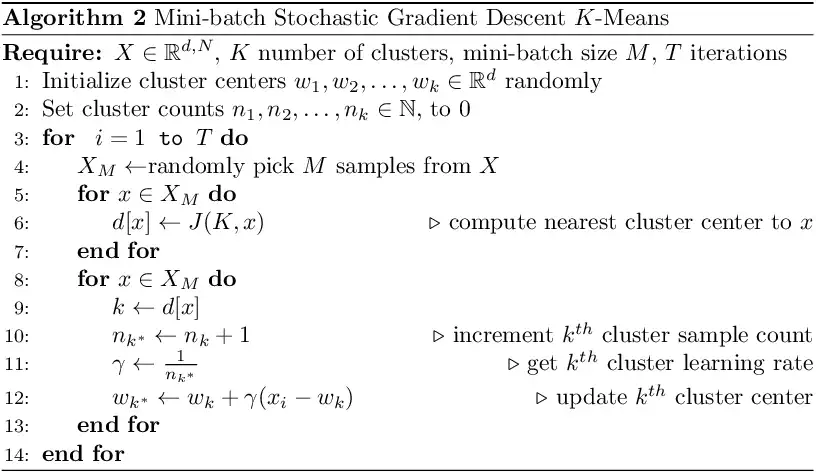

## Thư viện sử dụng 

- matplotlib: phục vụ vẽ các đồ thị 
- numpy: tính toán các phép biến đổi trên ma trận / vector 
- pandas: Xử lý dữ liệu bảng hai chiều

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
%matplotlib inline

blobs = pd.read_csv('./data/kmeans_blobs.csv')  # return DataFrame
col_names = list(blobs.columns[1:-1])

print(blobs.shape)

(60, 4)


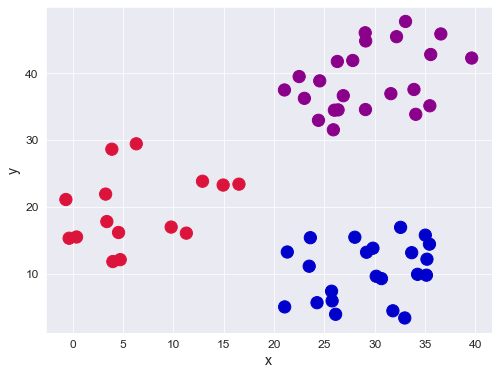

In [2]:
colorMap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])
figure, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=blobs['x'], y=blobs['y'], s=150, c=blobs['cluster'].astype('category'), cmap=colorMap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [3]:
def initiate_centroids(_k, dset):
    return dset.sample(_k)  # return k random sample in dset


np.random.seed(42)
k = 3
df = blobs[['x', 'y']]
centroids = initiate_centroids(k, df)
print(centroids)

         x       y
0   24.412  32.932
5   25.893  31.515
36  26.878  36.609


In [4]:
def rss_err(_a, _b):
    return np.square(np.sum((_a - _b) ** 2))

In [5]:
def centroid_assignation(_dset, _centroids):
    _k = _centroids.shape[0]
    _n = _dset.shape[0]
    assignation = []
    assign_errors = []
    for obs in range(_n):
        all_errors = np.array([])
        for centroid in range(_k):
            err = rss_err(_centroids.iloc[centroid, :], _dset.iloc[obs, :])
            all_errors = np.append(all_errors, err)
        min_indexes = np.where(all_errors == np.amin(all_errors))
        nearest_centroid = min_indexes[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors

In [6]:
df['centroid'], df['error'] = centroid_assignation(df, centroids)
print(df.head())

        x       y  centroid          error
0  24.412  32.932         0       0.000000
1  35.190  12.189         1  211534.211314
2  26.288  41.718         2     699.601495
3   0.376  15.506         0  776856.744109
4  26.116   3.963         1  576327.599678


C:\Users\Admin\AppData\Local\Temp/ipykernel_11180/2269414370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'], df['error'] = centroid_assignation(df, centroids)


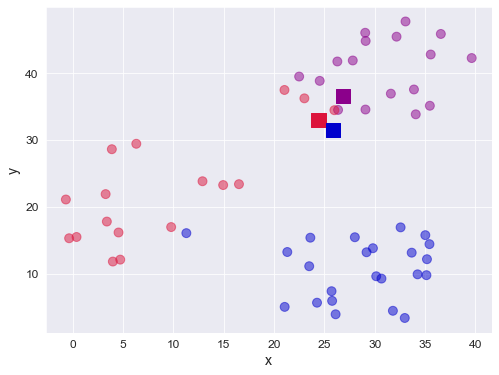

In [7]:
# show in graph
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='o', c=df['centroid'].astype('category'), cmap=colorMap, s=80,
            alpha=0.5)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], marker='s', s=200, c=[0, 1, 2], cmap=colorMap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [8]:
def kmeans(_dset, _k=2, _tol=1e-4):
    dset_cpy = _dset.copy()
    err = []
    goal_head = True
    j = 0

    _centroids = initiate_centroids(_k, _dset)

    while goal_head:
        dset_cpy['centroid'], j_err = centroid_assignation(dset_cpy, _centroids)
        err.append(sum(j_err))

        _centroids = dset_cpy.groupby('centroid').agg('mean').reset_index(drop=True)
        if j > 0:
            if err[j - 1] - err[j] <= _tol:
                goal_head = False
        j += 1

    dset_cpy['centroid'], j_err = centroid_assignation(dset_cpy, _centroids)
    _centroids = dset_cpy.groupby('centroid').agg('mean').reset_index(drop=True)

    return dset_cpy['centroid'], j_err, _centroids


np.random.seed(42)
df['centroid'], df['error'], centroids = kmeans(df[['x', 'y']], 3)
df.head()

,x,y,centroid,error
0,24.412,32.932,2,3767.568743
1,35.190,12.189,1,1399.889001
2,26.288,41.718,2,262.961097
3,0.376,15.506,0,2683.086425
4,26.116,3.963,1,2723.650198


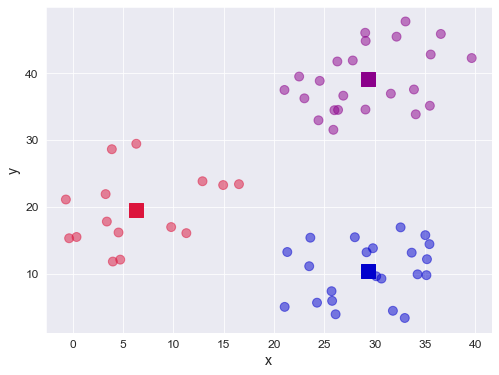

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='o', c=df['centroid'].astype('category'), cmap=colorMap, s=80,
            alpha=0.5)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], marker='s', s=200, c=[0, 1, 2], cmap=colorMap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

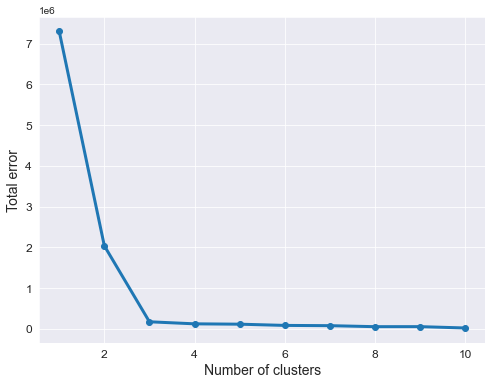

In [10]:
err_total = []
n = 10

df_elbow = blobs[['x', 'y']]
for i in range(n):
    a, my_errs, b = kmeans(df_elbow, i + 1)
    err_total.append(sum(my_errs))
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1, n + 1), err_total, linewidth=3, marker='o')
ax.set_xlabel(r'Number of clusters', fontsize=14)
ax.set_ylabel(r'Total error', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()